In [177]:
# Importando as bibliotecas necessárias
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import tools

In [179]:
df = pd.read_csv("C:\\Users\\rodri\\Projetos\\DataScience\\input\\house_california_1990\\housing_ca_1990.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [181]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [183]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [185]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [187]:
df.shape

(20640, 10)

In [189]:
# 1. Preparação dos Dados
# Substituindo valores NaN pela média
df_numeric = df.drop(columns=['ocean_proximity'])
df_numeric.fillna(df_numeric.mean(), inplace=True)

In [191]:
# Padronizando os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [193]:
# 2. Encontrar o número de clusters (Método do Cotovelo)
inertia = []
k_values = range(1, 6)  # O máximo de clusters será 5, já que temos apenas 5 amostras

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

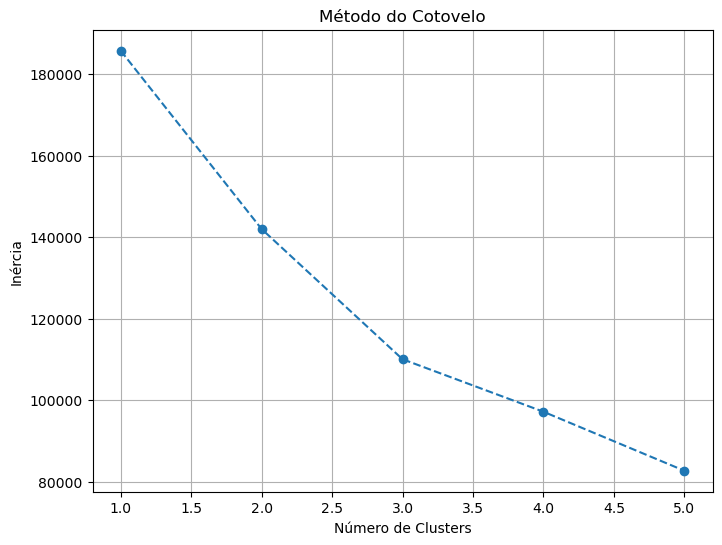

In [195]:
# Plotando o método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()

In [197]:
# 3. Aplicação do K-means com o número ideal de clusters (escolhido como 2)
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

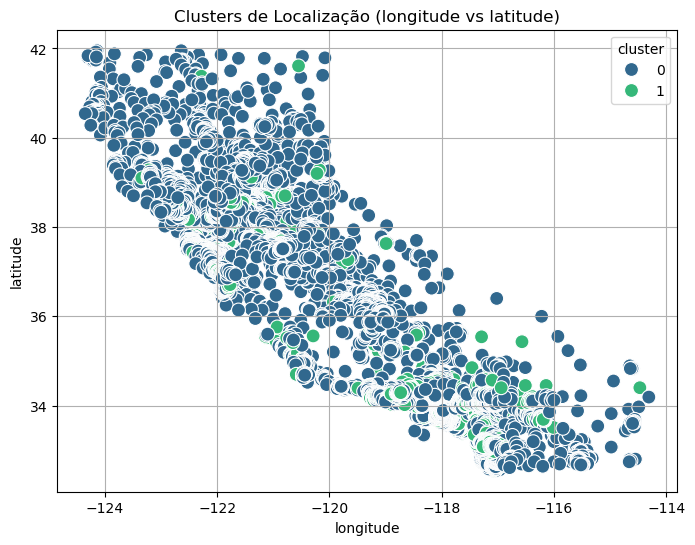

In [199]:
# 4. Visualização dos clusters em relação à localização geográfica
plt.figure(figsize=(8, 6))
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=df, palette='viridis', s=100)
plt.title('Clusters de Localização (longitude vs latitude)')
plt.grid(True)
plt.show()

In [203]:
# 5. Usar df_numeric para análise
cluster_analysis = df_numeric.groupby(df['cluster']).mean()

In [205]:
# Exibir o DataFrame de análise de clusters no console
print(cluster_analysis)

          longitude   latitude  housing_median_age  total_rooms  \
cluster                                                           
0       -119.619077  35.681710           30.097449  2079.209492   
1       -119.197110  35.255677           17.636853  6835.841408   

         total_bedrooms   population   households  median_income  \
cluster                                                            
0            426.861937  1147.871605   398.186173       3.829880   
1           1375.606381  3520.447205  1264.412422       4.178505   

         median_house_value  
cluster                      
0             204678.889108  
1             223284.185093  
